In [1]:
# Nama: Aulya Salsabila Khairunnisa
# NIM: 24060122140163
# Nama Dataset: Breast Cancer Wisconsin Dataset
# Link Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Mengunduh dataset dari URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

# Memilih dua fitur untuk clustering
X = data[['Feature_1', 'Feature_2']].values

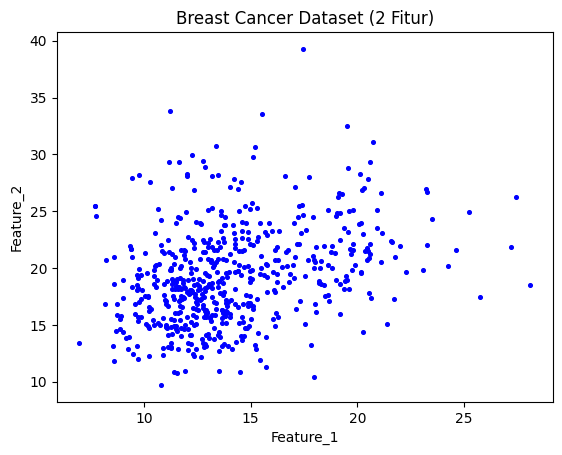

In [4]:
plt.scatter(X[:, 0], X[:, 1], c='blue', s=7)
plt.title("Breast Cancer Dataset (2 Fitur)")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

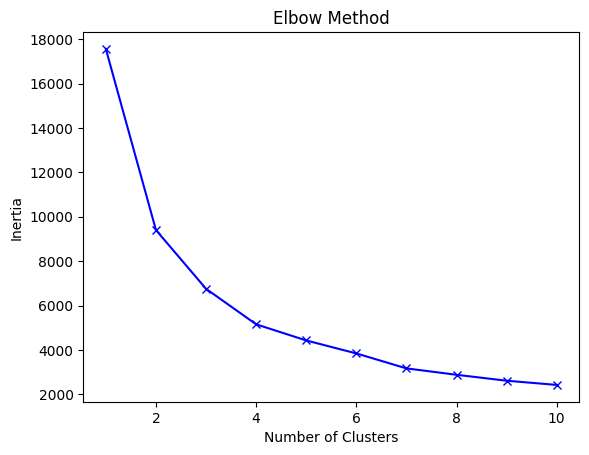

In [5]:
# Menentukan nilai inertia untuk beberapa nilai k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(K_range, inertia, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

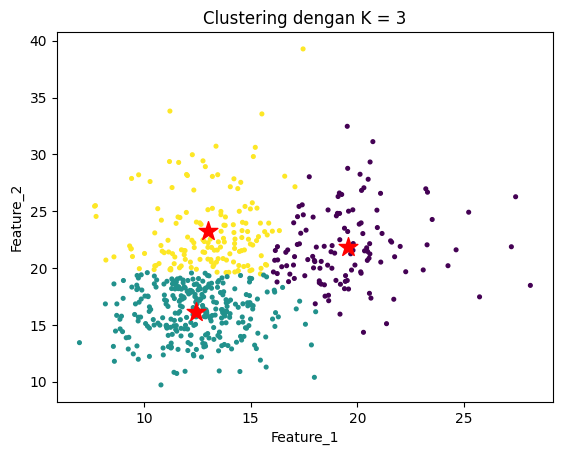

In [6]:
# Pilih K berdasarkan elbow method (misal K=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plot hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='*', s=200)
plt.title(f'Clustering dengan K = {k_optimal}')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

In [7]:
# Evaluasi menggunakan inertia dan silhouette coefficient
inertia_score = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

print(f'Inertia: {inertia_score}')
print(f'Silhouette Coefficient: {silhouette_avg}')

Inertia: 6754.191328685716
Silhouette Coefficient: 0.41323628412505803


In [ ]:
# Kesimpulan:
# Grafik elbow menunjukkan nilai 𝐾 optimal untuk dataset ini.
# Dengan 𝐾 optimal, data dikelompokkan berdasarkan fitur yang digunakan.
# Silhouette coefficient menunjukkan sejauh mana data dalam cluster serupa satu sama lain.